# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [11]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans
from scipy.stats import mode
# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [3]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


# Importing data

In [4]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [5]:
drop_rows = dataset.dropna()
print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [6]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

flower_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset["Flower"] = dataset["Flower"].map(flower_mapping)

print("\nDataset after encoding Flower column:")
print(dataset.head())
#Visualize the dataset



Dataset after encoding Flower column:
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


Now the label/category is numeric


4. Discard columns that won't be used


In [7]:
# If necesary, drop out non necesary columns
columns_to_drop = []
dataset_cleaned = dataset.drop(columns=columns_to_drop, axis=1)


5. Scatter plot of the data

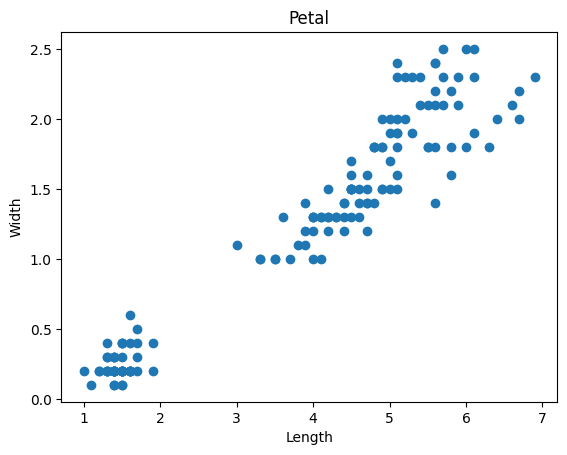

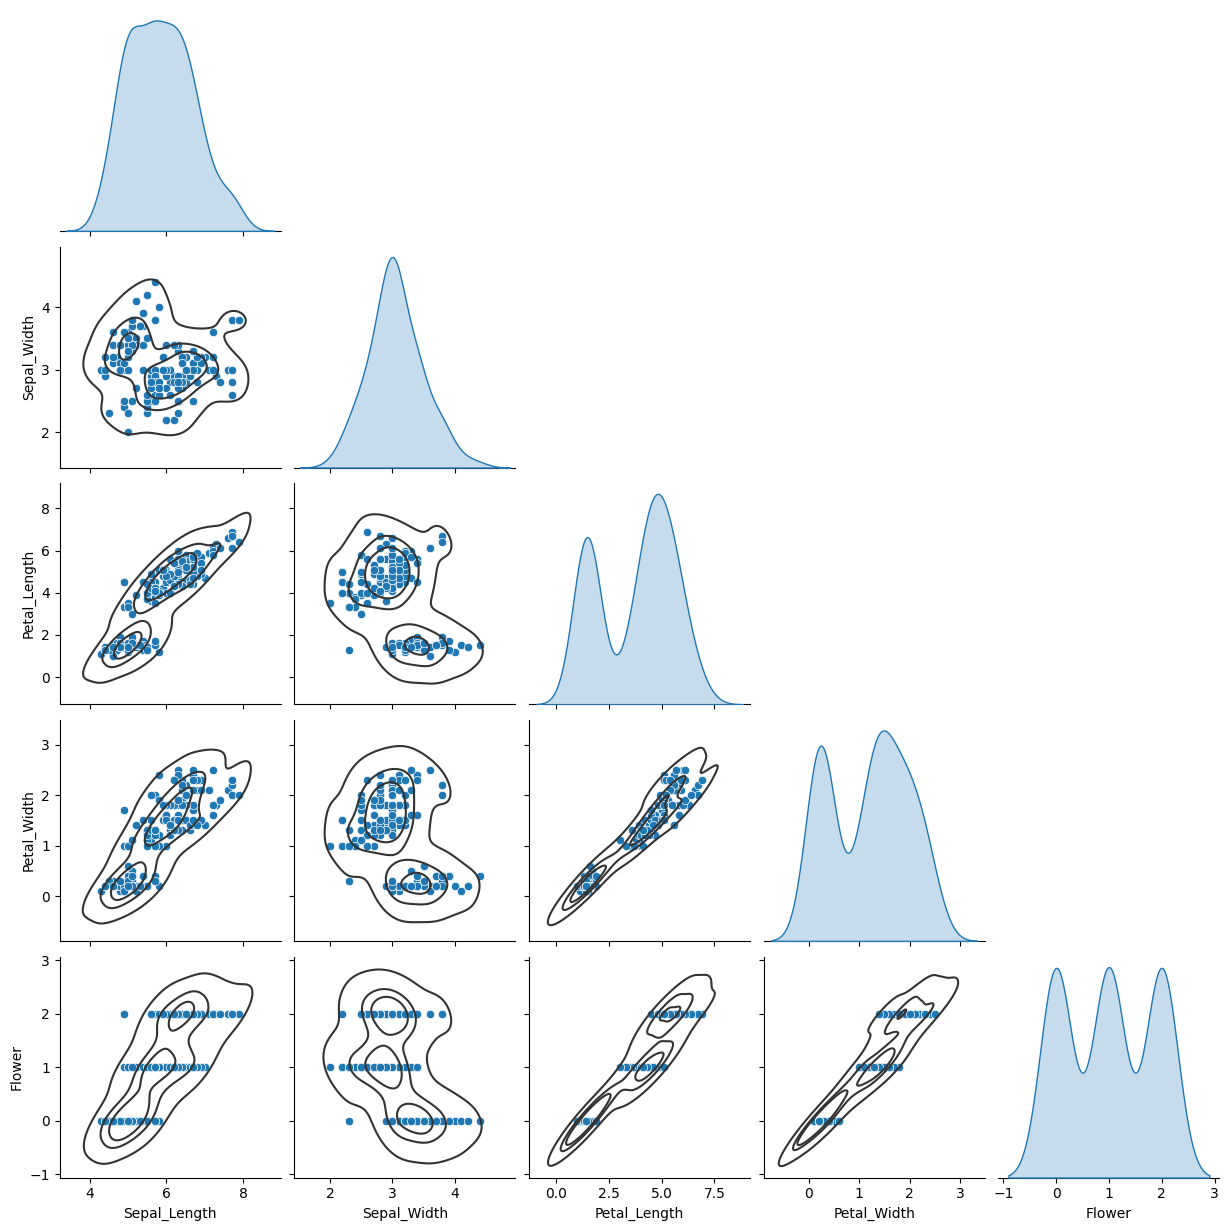

In [ ]:
# Pairplot: Scatterplot of all variables


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

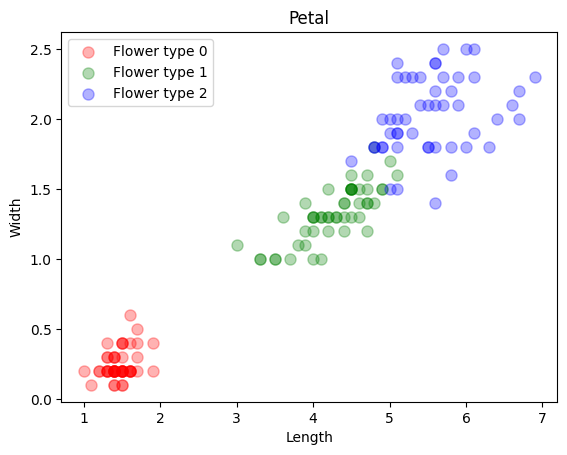

In [ ]:
# Get dataframes for each real cluster



Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [10]:
# Import sklearn KMeans
X = dataset.drop(columns=["Flower"])
# Define number of clusters
num_clusters = 3
# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
dataset["cluster"] = kmeans.fit_predict(X)
# Print estimated cluster of each point in the dataset
print("Cluster assignments for each point:")
print(dataset[["cluster"]].head())

Cluster assignments for each point:
   cluster
0        1
1        1
2        1
3        1
4        1


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [12]:
# Manual pairing the labels of the real and estimated clusters
from scipy.stats import mode

def map_clusters(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(3):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels

In [13]:
# Add a new column to the dataset with the cluster information
dataset["cluster_label"] = dataset["cluster"]

In [15]:
# Label of the estimated clusters
print("Estimated Cluste Labels:")
print(dataset["cluster_label"].value_counts())

Estimated Cluste Labels:
cluster_label
0    62
1    50
2    38
Name: count, dtype: int64


In [16]:
# Cluster centroides
print("\nCluster Centroids:")
print(kmeans.cluster_centers_)


Cluster Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [17]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print("\nSum of Squared Error (SSE):", sse)



Sum of Squared Error (SSE): 78.94084142614601


In [18]:
# The number of iterations required to converge

iterations = kmeans.n_iter_
print("\nNumber of Iterations to Converge:", iterations)


Number of Iterations to Converge: 4


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

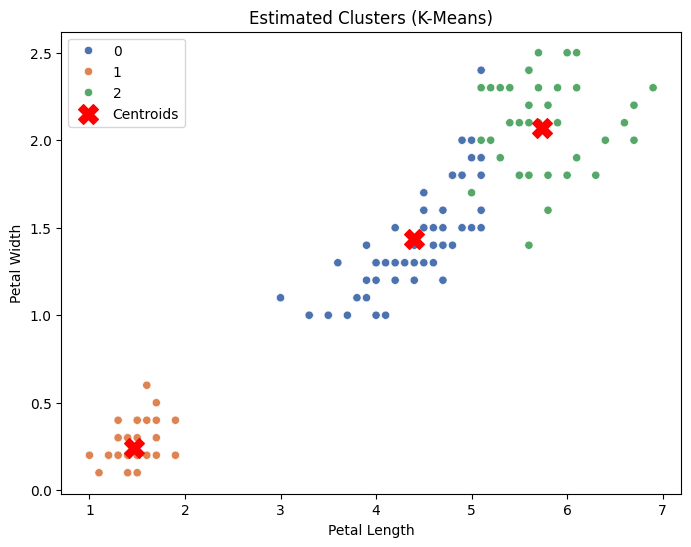

In [20]:
# Plot the estimated clusters


plt.figure(figsize=(8, 6))

# Scatter plot of clusters using petal_length and petal_width
sns.scatterplot(x=dataset["Petal_Length"], y=dataset["Petal_Width"], hue=dataset["cluster"], palette="deep")

# Mark cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Centroids')

plt.title("Estimated Clusters (K-Means)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()


## Plot both real and estimated clusters to check for errors

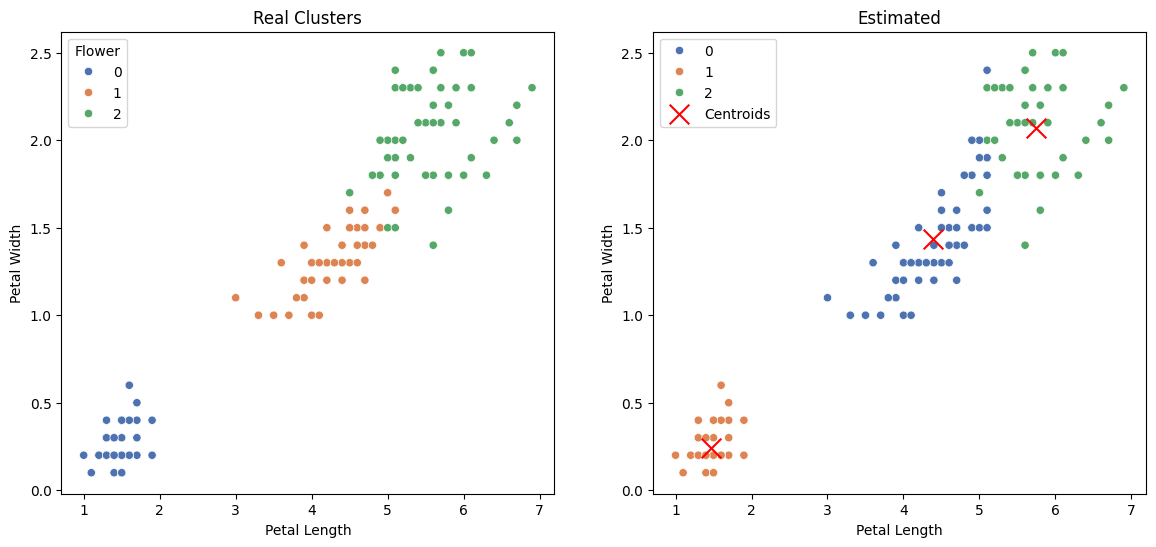

In [23]:
# Plot both real and estimated clusters to check for errors
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of real clusters
sns.scatterplot(x=dataset["Petal_Length"], y=dataset["Petal_Width"], hue=dataset["Flower"], palette="deep", ax=axes[0])
axes[0].set_title("Real Clusters")
axes[0].set_xlabel("Petal Length")
axes[0].set_ylabel("Petal Width")

# Scatter plot of estimated clusters
sns.scatterplot(x=dataset["Petal_Length"], y=dataset["Petal_Width"], hue=dataset["cluster"], palette="deep", ax=axes[1])
axes[1].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=200, c='red', marker='x', label='Centroids')
axes[1].set_title("Estimated")
axes[1].set_xlabel("Petal Length")
axes[1].set_ylabel("Petal Width")

plt.legend()
plt.show()



<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [24]:
# Intialize a list to hold sum of squared error (sse)
sse=[]
# Define values of k
k_values = range(1, 11)
# For each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)  # X is the dataset without the species column
    sse.append(kmeans.inertia_)

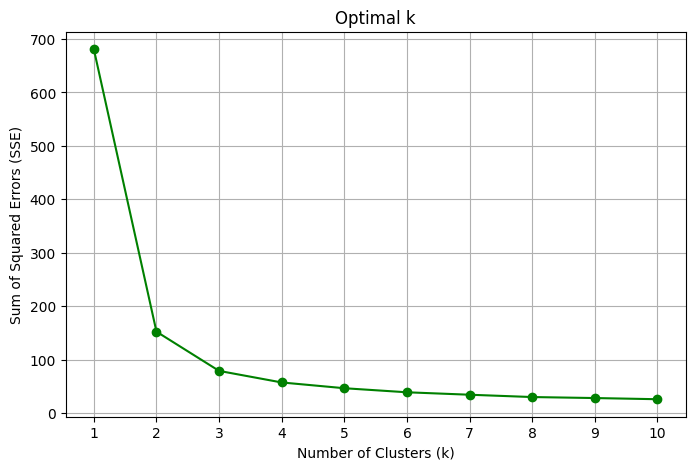

In [28]:
# Plot sse versus k
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker="o", linestyle="-", color="g")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Optimal k")
plt.xticks(k_values)
plt.grid()
plt.show()

Choose the k after which the sse is minimally reduced


In [ ]:
# when k = 3

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k